In [3]:
# import packages
import pandas as pd
pd.set_option("display.precision", 2)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import *
sns.set()

In [9]:
# number of endpoints and data volume per each filtration step
df_class = pd.read_csv('../data/tox21-data/class_summary_stats.csv')
total = df_class.isnull().sum().sort_values(ascending=False)
percent = (df_class.isnull().sum()/df_class.isnull().count()
           ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(df_class.head(20))
print(df_class.shape)
# cp class_summary_stats.csv ../data/used

        file  cyto         step  step#  endpoints  data_hitc=0  data_hitc=1
0    adapted  CTB+        start      0       1569     3.36e+06     344000.0
1    adapted  CTB+        NOCAS      1       1469     3.27e+06     334000.0
2    adapted  CTB+     cat35_46      2       1355     3.27e+06     334000.0
3    adapted  CTB+       3flags      3       1349     3.27e+06     309000.0
4    adapted  CTB+      cytotox      4       1261     3.27e+06      68900.0
5    adapted  CTB+       level7      5       1249     3.27e+06      67100.0
6    adapted  CTB+       concat      6       1257     1.76e+06      48700.0
7    adapted  CTB+  hitc1_rates      7        732     1.35e+06      48400.0
8    adapted  CTB+   500samples      8        400     1.30e+06      39700.0
9    adapted  CTB+       voting      9        400     7.84e+05      31500.0
10  adapted2  CTB-        start      0       1569     3.36e+06     344000.0
11  adapted2  CTB-        NOCAS      1       1469     3.27e+06     334000.0
12  adapted2

In [ ]:
%config InlineBackend.figure_format = 'retina'
# Draw a nested barplot for hitc=1
df_class["data_hitc=1"] = pd.to_numeric(df_class["data_hitc=1"])
sns.set(font_scale = 1.5)
sns.set_style("white")
g = sns.catplot(
    data=df_class, kind="bar",
    x="step", y="data_hitc=1", hue="cyto", 
    palette="RdYlGn", alpha=.85, height=6, edgecolor="k")
plt.xticks(rotation=90)
g.set_xticklabels(["Start", "NOCAS", "Cat.", "Flags", "CTB", "Resamp.", "Concat.", "Hitc", "Samples", "Voting"])
g.set_axis_labels("", "# of data points with hitc==1")
g.set_titles("{col_name} {col_var}")
g.legend.set_title("")
plt.savefig('../plots/tox21/cat_hitc1_tox21_filtering.svg', bbox_inches = 'tight', dpi = 300)

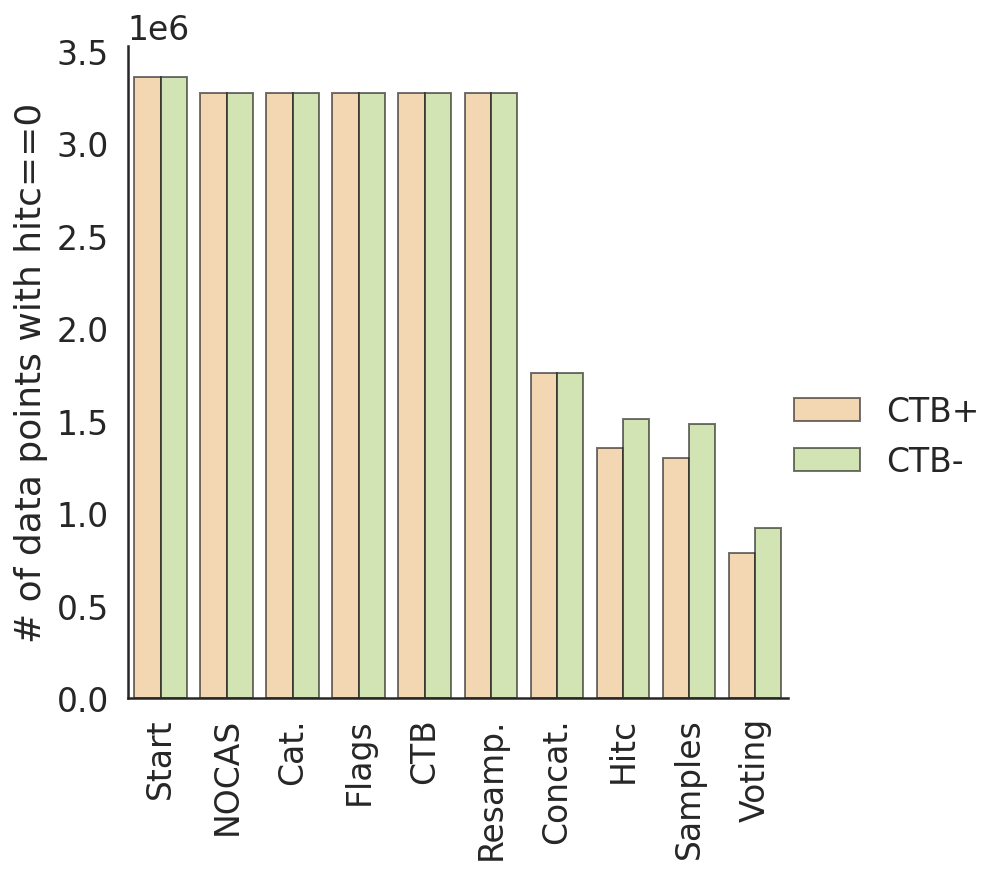

In [35]:
# Draw a nested barplot for hitc=0
df_class["data_hitc=0"] = pd.to_numeric(df_class["data_hitc=0"])
sns.set(font_scale=1.5)
sns.set_style("white")
g = sns.catplot(
    data=df_class, kind="bar",
    x="step", y="data_hitc=0", hue="cyto",
    palette="RdYlGn", alpha=.85, height=6, edgecolor = "k"
)
plt.xticks(rotation=90)
g.set_xticklabels(["Start", "NOCAS", "Cat.", "Flags", "CTB",
                  "Resamp.", "Concat.", "Hitc", "Samples", "Voting"])
g.set_axis_labels("", "# of data points with hitc==0")
g.set_titles("{col_name} {col_var}")
g.legend.set_title("")
plt.savefig('../plots/tox21/cat_hitc0_tox21_filtering.svg', bbox_inches = 'tight', dpi = 300)

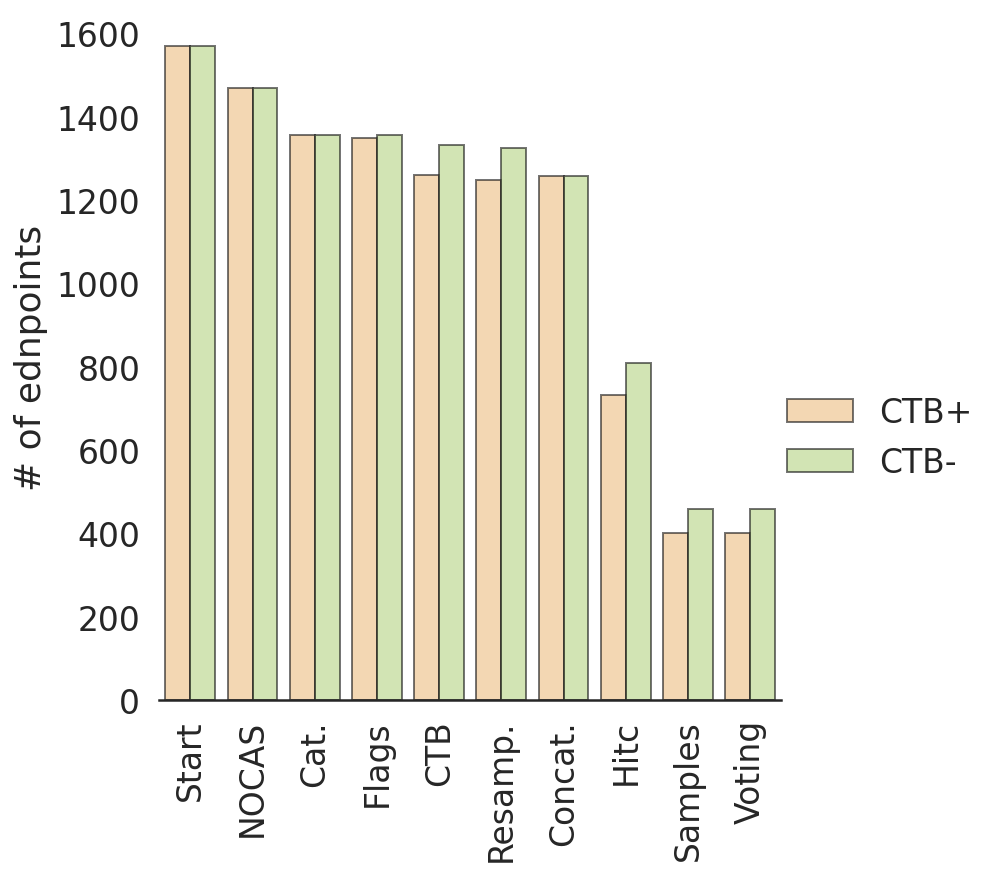

In [34]:
# Draw a nested barplot for hitc=0
sns.set(font_scale=1.5)
sns.set_style("white")
g = sns.catplot(
    data=df_class, kind="bar",
    x="step", y="endpoints", hue="cyto",
    palette="RdYlGn", alpha=.85, height=6, edgecolor = "k"
)
plt.xticks(rotation=90)
g.set_xticklabels(["Start", "NOCAS", "Cat.", "Flags", "CTB",
                  "Resamp.", "Concat.", "Hitc", "Samples", "Voting"])
g.set_axis_labels("", "# of ednpoints")
g.despine(left=True)
g.set_titles("{col_name} {col_var}")
g.legend.set_title("")
plt.savefig('../plots/tox21/cat_endpoints_tox21_filtering.svg', bbox_inches = 'tight', dpi = 300)